In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 41kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=2fc3f301955ea22a03a66dbd0d28e554ef5bfa1a21fc4c0a3c640bd88933fe0d
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data,exposure
import cv2


In [ ]:
image=cv2.imread('amazn_.jpg')

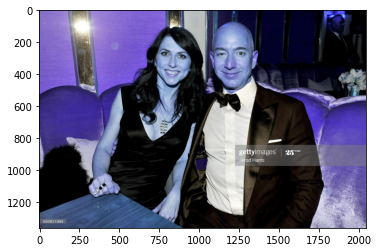

In [ ]:
plt.imshow(image)

In [ ]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


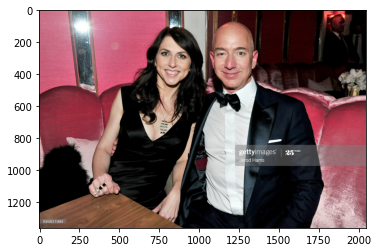

In [ ]:
plt.imshow(image)

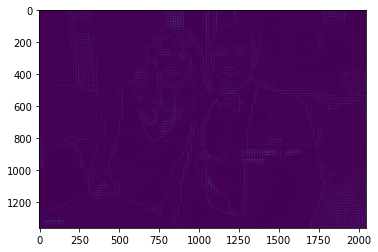

In [ ]:
fd,hog_image=hog(image,orientations=8,pixels_per_cell=(16, 16), cells_per_block=(6, 6),visualize=True, multichannel=True)
plt.imshow(hog_image)

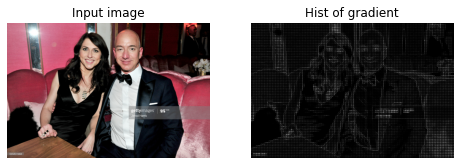

In [ ]:
#plot input and hog image
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)
ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Input image')
#Rescale histogram
hog_image_rescale=exposure.rescale_intensity(hog_image,in_range=(0,10))
ax2.axis('off')
ax2.imshow(hog_image_rescale,cmap=plt.cm.gray)
ax2.set_title('Hist of gradient')
plt.show()

In [ ]:
import face_recognition
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
%matplotlib inline

In [ ]:
face_locations=face_recognition.face_locations(image)
no_of_face=len(face_locations)
print("found {} faces in input image".format(no_of_face))

found 2 faces in input image


In [ ]:
from google.colab.patches import cv2_imshow

a face is located at top:201,left:1062,bottom:468,right:1330
a face is located at top:217,left:736,bottom:440,right:959


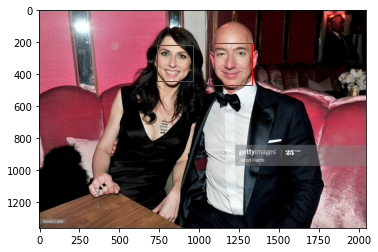

In [ ]:
plt.imshow(image)
ax=plt.gca()
for face_location in face_locations:
  top,right,bottom,left=face_location
  x,y,w,h=left,top,right,bottom
  print("a face is located at top:{},left:{},bottom:{},right:{}".format(y,x,h,w))
  #draw a rectngle in face
  rect=Rectangle((x,y),w-x,h-y,fill=False,color='red')
  ax.add_patch(rect)
  
plt.show()

In [ ]:
abdul=cv2.imread('abdul kalam.jpg')
sundar=cv2.imread('sundar_pichai.jpg')
shivan=cv2.imread('shivan.jpg')
jeff_bezos=cv2.imread('jeff_bezos.jpg')
unknown=cv2.imread('unknwn.jpg')

In [ ]:
abdul=cv2.cvtColor(abdul,cv2.COLOR_BGR2RGB)
sundar=cv2.cvtColor(sundar,cv2.COLOR_BGR2RGB)
shivan=cv2.cvtColor(shivan,cv2.COLOR_BGR2RGB)
jeff_bezos=cv2.cvtColor(jeff_bezos,cv2.COLOR_BGR2RGB)

In [ ]:
abdul_encode=face_recognition.face_encodings(abdul)
shivan_encode=face_recognition.face_encodings(shivan)
sundar_encode=face_recognition.face_encodings(sundar)
jeff_bezos_encode=face_recognition.face_encodings(jeff_bezos)


In [ ]:
known_face_encodings=[abdul_encode,
                      shivan_encode,
                      sundar_encode,
                      jeff_bezos_encode
]

In [ ]:
unknown=cv2.cvtColor(unknown,cv2.COLOR_BGR2RGB)
unknown_encode=face_recognition.face_encodings(unknown)


In [ ]:
from scipy.spatial import distance
results=[]

In [ ]:
for known_face_encoding in known_face_encodings: 
  d=distance.euclidean(known_face_encoding,unknown_encode)
  results.append(d)

In [ ]:
threshold=0.6
results=np.array(results)<=0.6
name="unknown"
if results[0]:
  name="abdul kalam"
elif results[1]:
  name="shivan"
elif results[2]:
  name="sundar pichai"
elif results[3]:
  name="jeff_bezos"
print(f"found {name} in the photo")

found abdul in the photo


In [ ]:
from PIL import Image,ImageDraw

In [ ]:
pil_image=Image.fromarray(unknown)
draw=ImageDraw.Draw(pil_image)

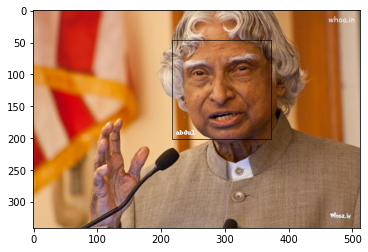

In [ ]:
plt.imshow(pil_image)
ax=plt.gca()
fa_locations=face_recognition.face_locations(unknown)
for face_location in fa_locations:
  top,right,bottom,left=face_location
  x,y,w,h=left,top,right,bottom
  draw.rectangle(((x,y),(w,h)),outline=(0,0,0))
  text_width,text_height=draw.textsize(name)
  #draw.rectangle(((x-h-text_height-10),(w,h-1)),fill=(0,0,0),outline=(0,0,0))
  text=draw.text((x+6,h-text_height-5),name,fill=(255,255,255,255))
pil_image.show()
  



In [ ]:
image=cv2.imread('amazn_.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

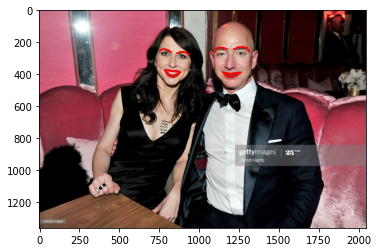

In [ ]:
face_landmarks_list=face_recognition.face_landmarks(image)
import matplotlib.lines as mlines
from matplotlib.patches import Polygon
plt.imshow(image)
ax=plt.gca()
for face_landmarks in face_landmarks_list:
  left_eyebrow=face_landmarks['left_eyebrow']
  pre_x,pre_y=left_eyebrow[0]
  for (x,y) in left_eyebrow[1:]:
    l=mlines.Line2D([pre_x,x],[pre_y,y],color='red')
    ax.add_line(l)
    pre_x,pre_y=x,y
  right_eyebrow=face_landmarks['right_eyebrow']
  pre_x,pre_y=right_eyebrow[0]
  for (x,y) in right_eyebrow[1:]:
    l=mlines.Line2D([pre_x,x],[pre_y,y],color='red')
    ax.add_line(l)
    pre_x,pre_y=x,y
  p=Polygon(face_landmarks['top_lip'],facecolor='brown',edgecolor='red')
  ax.add_patch(p)
  g=Polygon(face_landmarks['bottom_lip'],facecolor='brown',edgecolor='red')
  ax.add_patch(g)
plt.show()